In [1]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [3]:
classes = np.unique(train_Y)
nClasses = len(classes)

Text(0.5,1,'Label: 9')

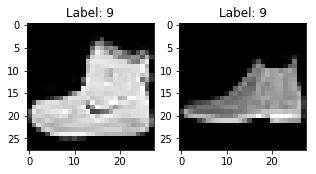

In [4]:
plt.figure(figsize = (5, 5))

plt.subplot(121)
plt.imshow(train_X[0], cmap = 'gray')
plt.title('Label: {}'.format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[0], cmap = 'gray')
plt.title('Label: {}'.format(test_Y[0]))

In [5]:
# Recall that a -1 reshape is just a wildcard that we want numpy to predict
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32')
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [6]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [7]:
train_X, test_X, train_Y, test_Y = train_test_split(train_X, 
                                                    train_Y_one_hot,
                                                    test_size = 0.2,
                                                    random_state = 123)

This example uses:
* 32 3x3 kernels
* 64 3x3 kernels
* 128 3x3 kernels
* 3 2x2 max pooling layers

In [8]:
batch_size = 64
epochs = 20
num_classes = 10

In [9]:
# Check what is same padding
# Note the repeating convolution, activation, pooling actions
fashion_model = Sequential()

fashion_model.add(Conv2D(32, 
                        kernel_size = (3,3), 
                        activation = 'linear',
                        input_shape = (28, 28, 1), 
                        padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2,), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, 
                        kernel_size = (3,3), 
                        activation = 'linear',
                        input_shape = (28, 28, 1), 
                        padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2,), padding = 'same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Conv2D(128, 
                        kernel_size = (3,3), 
                        activation = 'linear',
                        input_shape = (28, 28, 1), 
                        padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2,), padding = 'same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation = 'softmax'))

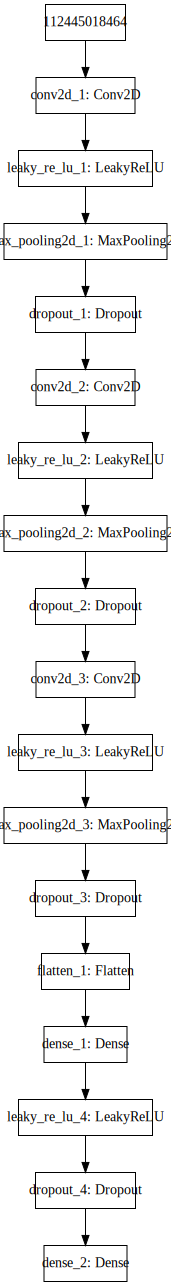

In [10]:
SVG(model_to_dot(fashion_model).create(prog = 'dot', format = 'svg'))

In [11]:
fashion_model.compile(loss = keras.losses.categorical_crossentropy,
                      optimizer = keras.optimizers.Adam(),
                      metrics = ['accuracy'])

In [12]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [13]:
fashion_train = fashion_model.fit(train_X,
                                  train_Y,
                                  batch_size = batch_size,
                                  epochs = epochs,
                                  verbose = 1,
                                  validation_data = (test_X, test_Y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 65s 1ms/step - loss: 0.6348 - acc: 0.7635 - val_loss: 0.3889 - val_acc: 0.8617
Epoch 2/20
48000/48000 [==============================] - 69s 1ms/step - loss: 0.3952 - acc: 0.8555 - val_loss: 0.3067 - val_acc: 0.8878
Epoch 3/20
48000/48000 [==============================] - 66s 1ms/step - loss: 0.3467 - acc: 0.8725 - val_loss: 0.2935 - val_acc: 0.8927
Epoch 4/20
48000/48000 [==============================] - 66s 1ms/step - loss: 0.3150 - acc: 0.8839 - val_loss: 0.2959 - val_acc: 0.8871
Epoch 5/20
48000/48000 [==============================] - 66s 1ms/step - loss: 0.2990 - acc: 0.8882 - val_loss: 0.2530 - val_acc: 0.9056
Epoch 6/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.2872 - acc: 0.8926 - val_loss: 0.2520 - val_acc: 0.9073
Epoch 7/20
48000/48000 [==============================] - 61s 1ms/step - loss: 0.2745 - acc: 0.8971 - val_loss: 0.2340 - val_acc

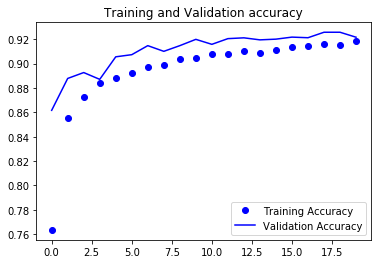

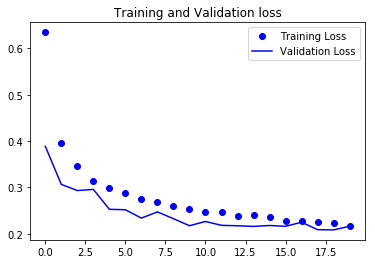

In [14]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

In [28]:
# Predicted classes are probabilities, recall softmax
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis = 1)

In [25]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found {} correct labels".format(len(correct)))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_X[correct].reshape(28, 28), cmap = 'gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 0 correct labels


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print "Found %d incorrect labels" % len(incorrect)
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

array([0, 1, 8, ..., 9, 6, 7])